### Feature Normalization

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import boxcox, probplot, shapiro , zscore
from sklearn.preprocessing import PowerTransformer

In [7]:
data =  np.random.exponential(scale=2, size=1000)

#### Explore the Data

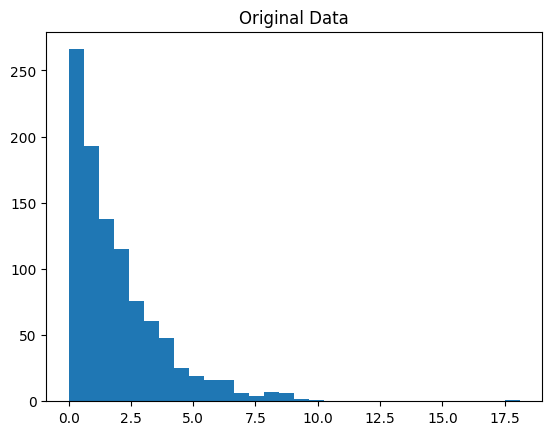

In [8]:
plt.hist(data, bins=30)
plt.title("Original Data")
plt.show()

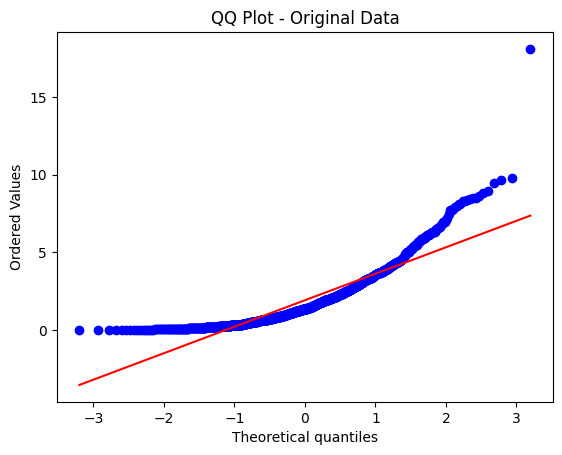

In [9]:
probplot(data, dist="norm", plot=plt)
plt.title("QQ Plot - Original Data")
plt.show()

In [10]:
stat, p = shapiro(data)
print(f"Shapiro-Wilk Test: Statistic={stat}, P-value={p}")
if p > 0.05:
    print("Data is likely normal.")
else:
    print("Data is not normal.")

Shapiro-Wilk Test: Statistic=0.8255607243337545, P-value=1.27895179029816e-31
Data is not normal.


### Apply Transformations

In [21]:
# Log Transformation
log_transformed = np.log1p(data)  # log(x + 1)

In [22]:
# Square Root Transformation
sqrt_transformed = np.sqrt(data)

In [23]:
# Box-Cox Transformation
data_positive = data + abs(data.min()) + 1  # Make data positive
boxcox_transformed, lambda_ = boxcox(data_positive)

In [ ]:
# Apply Yeo-Johnson Transformation
transformer = PowerTransformer(method='yeo-johnson')
yeo_johnson_transformed = transformer.fit_transform(data.reshape(-1, 1)).flatten()

In [26]:
# Z-Score Normalization
zscore_transformed = zscore(data)

### Evaluate the Transformed Data

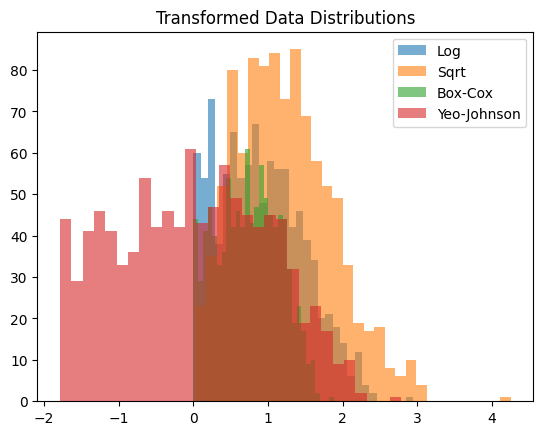

In [27]:
plt.hist(log_transformed, bins=30, alpha=0.6, label="Log")
plt.hist(sqrt_transformed, bins=30, alpha=0.6, label="Sqrt")
plt.hist(boxcox_transformed, bins=30, alpha=0.6, label="Box-Cox")
plt.hist(yeo_johnson_transformed, bins=30, alpha=0.6, label="Yeo-Johnson")
plt.legend()
plt.title("Transformed Data Distributions")
plt.show()

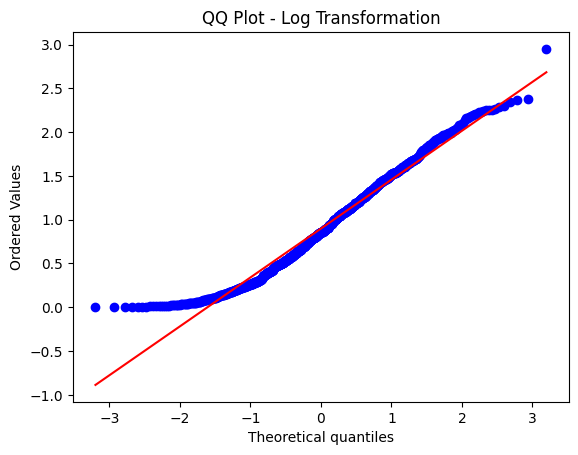

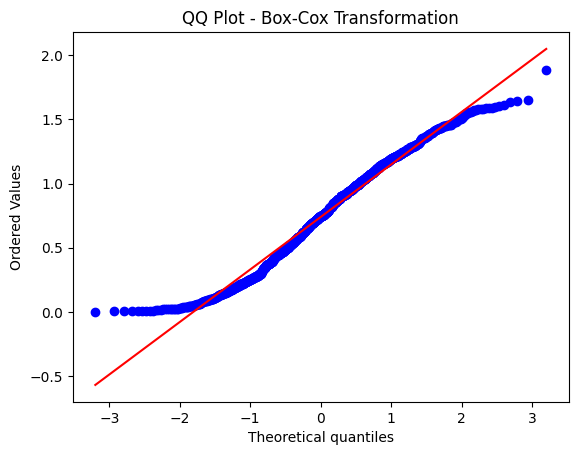

In [28]:
probplot(log_transformed, dist="norm", plot=plt)
plt.title("QQ Plot - Log Transformation")
plt.show()

probplot(boxcox_transformed, dist="norm", plot=plt)
plt.title("QQ Plot - Box-Cox Transformation")
plt.show()


In [29]:
stat, p = shapiro(boxcox_transformed)
print(f"Shapiro-Wilk Test (Box-Cox): Statistic={stat}, P-value={p}")

Shapiro-Wilk Test (Box-Cox): Statistic=0.9768222670415306, P-value=1.543351439137129e-11
